In [2]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv("final_result_impl_huffman.csv")
x = list(data['obj1'])
y = list(map(lambda x: 1/x, list(data['obj2'])))

pandas.core.frame.DataFrame

In [113]:
# assign_codeword = 1
def assign_codeword(i):
    if i % 2 == 1:
        return True
    return False
    
# set bounds = value of desired copy0 value
def copy0(i, mini, maxi):
    if i >= mini and i < maxi:
        return True
    return False

color_list = ["blue"] * len(x)
for i in range(len(x)):
#    if data['movenodes'][i] == 2 and data['computehistogram'][i] == 2:
    if data['copy1'][i] <= 4 and data['computehistogram'][i] > 1 and data['computehistogram_partition'][i] < 4:
        color_list[i] = "orange"
    


In [54]:
fast = data['obj1'] > 40.9
fast_cluster = data[fast]
fast_cluster.mean()

design                         929.993517
copy0                            4.142626
copy1                            2.090762
computehistogram                 2.905997
computehistogram_partition       1.636953
resort                           1.499190
processsymbols                   1.427877
movenodes                        1.500810
assigncodeword                   1.499190
obj1                            43.961912
obj2                          1264.278768
dtype: float64

In [53]:
not_fast = data['obj1'] < 40.9
everything_else = data[not_fast]
everything_else.mean()

design                        1041.682630
copy0                            4.142959
copy1                            4.481773
computehistogram                 2.080772
computehistogram_partition       2.640457
resort                           1.500357
processsymbols                   1.428878
movenodes                        1.499643
assigncodeword                   1.500357
obj1                            32.334491
obj2                          1428.120086
dtype: float64

In [58]:
from scipy.stats import ttest_ind

print(ttest_ind(fast_cluster['copy0'], everything_else['copy0']))
print(ttest_ind(fast_cluster['copy1'], everything_else['copy1']))
print(ttest_ind(fast_cluster['computehistogram'], everything_else['computehistogram']))
print(ttest_ind(fast_cluster['computehistogram_partition'], everything_else['computehistogram_partition']))
print(ttest_ind(fast_cluster['resort'], everything_else['resort']))
print(ttest_ind(fast_cluster['processsymbols'], everything_else['processsymbols']))
print(ttest_ind(fast_cluster['movenodes'], everything_else['movenodes']))
print(ttest_ind(fast_cluster['assigncodeword'], everything_else['assigncodeword']))

Ttest_indResult(statistic=-0.0026119523003107653, pvalue=0.9979162246341902)
Ttest_indResult(statistic=-20.233196937026076, pvalue=5.12807529095977e-83)
Ttest_indResult(statistic=14.368494375581175, pvalue=1.2152665178011462e-44)
Ttest_indResult(statistic=-17.917830644200695, pvalue=9.845879898769079e-67)
Ttest_indResult(statistic=-0.04830349390344162, pvalue=0.9614791594352439)
Ttest_indResult(statistic=-0.04183204675410356, pvalue=0.9666367342531175)
Ttest_indResult(statistic=0.04830349390344162, pvalue=0.9614791594352439)
Ttest_indResult(statistic=-0.04830349390344162, pvalue=0.9614791594352439)


In [112]:
o = (fast_cluster['copy1'] <= 4) & (fast_cluster['computehistogram'] > 1) & (fast_cluster['computehistogram_partition'] == 1)
oranged = fast_cluster[o]
not_oranged = fast_cluster[(fast_cluster['copy1'] > 4) | (fast_cluster['computehistogram'] <= 1) | (fast_cluster['computehistogram_partition'] != 1)]

print(ttest_ind(oranged['copy0'], not_oranged['copy0']))
print(ttest_ind(oranged['copy1'], not_oranged['copy1']))
print(ttest_ind(oranged['computehistogram'], not_oranged['computehistogram']))
print(ttest_ind(oranged['computehistogram_partition'], not_oranged['computehistogram_partition']))
print(ttest_ind(oranged['resort'], not_oranged['resort']))
print(ttest_ind(oranged['processsymbols'], not_oranged['processsymbols']))
print(ttest_ind(oranged['movenodes'], not_oranged['movenodes']))
print(ttest_ind(oranged['assigncodeword'], not_oranged['assigncodeword']))

print("\nOranged Mean:")
print(oranged.mean())
print("\nNOT Oranged Mean:")
print(not_oranged.mean())


Ttest_indResult(statistic=0.002378521154837325, pvalue=0.998102987784925)
Ttest_indResult(statistic=5.435892936139773, pvalue=7.870621348669899e-08)
Ttest_indResult(statistic=2.567896354850933, pvalue=0.010466830978932563)
Ttest_indResult(statistic=-32.036266422423395, pvalue=3.279728419489052e-133)
Ttest_indResult(statistic=0.04395113805870494, pvalue=0.9649576184755556)
Ttest_indResult(statistic=0.038070488278311526, pvalue=0.9696438355155156)
Ttest_indResult(statistic=-0.04395113805870494, pvalue=0.9649576184755556)
Ttest_indResult(statistic=0.04395113805870494, pvalue=0.9649576184755556)

Oranged Mean:
design                         948.071429
copy0                            4.142857
copy1                            2.333333
computehistogram                 3.000000
computehistogram_partition       1.000000
resort                           1.500000
processsymbols                   1.428571
movenodes                        1.500000
assigncodeword                   1.500000
obj1    

In [46]:
# identify pareto points as orange
# color_list = ["orange"] * len(x)
# for i in range(len(x)):
#     xval = x[i]
#     yval = y[i]
#     for j in range(len(x)):
#         if j == i:
#             continue
#         if x[j] >= xval and y[j] >= yval:
#             color_list[i] = "blue"
#             break
# color_list[0] = "red"
            
# print(len(list(filter(lambda x: x == "orange" or x == "red", color_list))))


Text(0.5, 1.0, 'Huffman Encoding Design Space Output - Vivado')

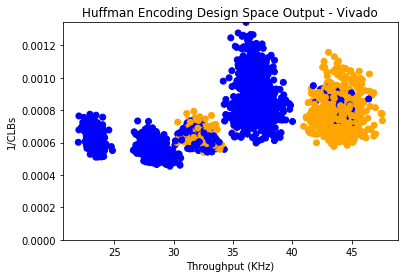

In [114]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=color_list)
ax.set_ylim(0, max(y))
ax.set_xlabel("Throughput (KHz)")
ax.set_ylabel("1/CLBs")
ax.set_title("Huffman Encoding Design Space Output - Vivado")